# CORRELATION BETWEEN ATTRITION AND OTHER VARIABLE

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t
import seaborn as sns

In [2]:
df = pd.read_csv('general_data.csv')
df.drop_duplicates(inplace = True) 
df.dropna(inplace = True)

In [3]:
df.Attrition = df.Attrition.map({'Yes' : 1, 'No' : 0})

In [4]:
df.Gender = df.Gender.map({'Male' : 1, 'Female' : 0})

In [5]:
df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,0,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,0,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,1,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,1,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,1,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,0,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,0,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,1,Travel_Rarely,Research & Development,11,2,Medical,1,7,1,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,0,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,1,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,0,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,1,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,0,Non-Travel,Research & Development,7,4,Medical,1,10,0,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [6]:
correlation = df.corr()
correlation

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.158399,0.007376,-0.033900,NaN,0.008105,-0.040625,-0.001137,-0.045163,0.299527,-0.032561,NaN,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580
Attrition,-0.158399,1.000000,-0.009449,-0.017106,NaN,-0.004621,0.018396,-0.012382,-0.030160,0.042831,0.033153,NaN,-0.008164,-0.169670,-0.047586,-0.133003,-0.031423,-0.154692
DistanceFromHome,0.007376,-0.009449,1.000000,-0.007491,NaN,-0.000326,-0.042610,-0.039990,-0.022757,-0.014449,0.037720,NaN,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773
Education,-0.033900,-0.017106,-0.007491,1.000000,NaN,-0.009389,-0.017671,0.045822,0.007289,-0.016210,-0.041054,NaN,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008105,-0.004621,-0.000326,-0.009389,NaN,1.000000,-0.012812,-0.003090,0.007865,0.000719,-0.004877,NaN,-0.013488,-0.001688,-0.012102,0.004117,0.000814,0.009079
Gender,-0.040625,0.018396,-0.042610,-0.017671,NaN,-0.012812,1.000000,-0.026019,0.006805,-0.066860,0.013207,NaN,0.022043,-0.028251,-0.032597,-0.018659,-0.023018,0.002688
JobLevel,-0.001137,-0.012382,-0.039990,0.045822,NaN,-0.003090,-0.026019,1.000000,0.046688,-0.009759,0.010874,NaN,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898
MonthlyIncome,-0.045163,-0.030160,-0.022757,0.007289,NaN,0.007865,0.006805,0.046688,1.000000,-0.021446,0.004607,NaN,0.027242,-0.034398,0.049780,0.000088,0.064470,0.023095
NumCompaniesWorked,0.299527,0.042831,-0.014449,-0.016210,NaN,0.000719,-0.066860,-0.009759,-0.021446,1.000000,0.030064,NaN,0.016291,0.238807,-0.031335,-0.117213,-0.035855,-0.109372


In [7]:
Attrition_corr = correlation.loc[:, ['Attrition']].drop(['EmployeeCount', 'StandardHours', 'Attrition', 'EmployeeID']).sort_values(by = 'Attrition', ascending= False)

Attrition_corr

,Attrition
NumCompaniesWorked,0.042831
PercentSalaryHike,0.033153
Gender,0.018396
StockOptionLevel,-0.008164
DistanceFromHome,-0.009449
JobLevel,-0.012382
Education,-0.017106
MonthlyIncome,-0.030160
YearsSinceLastPromotion,-0.031423
TrainingTimesLastYear,-0.047586


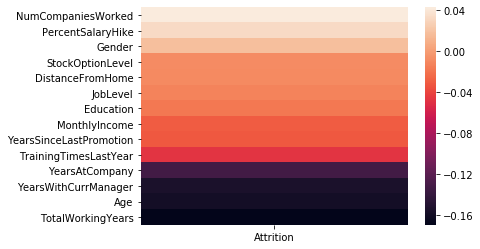

In [8]:
sns.heatmap(Attrition_corr, vmax=Attrition_corr.max(), vmin=Attrition_corr.min())

## In the correleation table : <br>
We can conclude that <br>
NumCompaniesWorked, PercentSalaryHike , Gender	
have <b>Possitive Correlation with Attrition</b>

and <b>other variables have Negative Correlation</b>